**Klasifikasi Spesies Bunga**

Pada kasus ini kita akan memodelkan AI untuk mengklasifikasikan spesies bunga berdasarkan panjang dan lebar daun.

Parameter:
1. Panjang: Panjang daun bunga
2. Lebar: Lebar daun bunga

Kelas:
1. Spesies A
2. Spesies B

In [2]:
# IMPORT LIBRARY UNTUK PEMODELAN DAN PENGOLAHAN DATA
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# !wget https://raw.githubusercontent.com/SangsakaWira/Materi-AI-Codedirect/master/Dataset/data-bunga.csv #untuk colab
!curl -O https://raw.githubusercontent.com/SangsakaWira/Materi-AI-Codedirect/master/Dataset/data-bunga.csv #untuk mac

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   136  100   136    0     0    239      0 --:--:-- --:--:-- --:--:--   239


In [0]:
# PENGAMBILAN DATA UNTUK PEMODELAN AI
data = pd.read_csv("data-bunga.csv",sep=";")

In [0]:
# ANALISA DATA SEBELUM TRAINING
data

,panjang,lebar,target
0,4,2,0
1,5,3,0
2,6,3,0
3,13,9,1
4,5,3,0
5,10,9,1
6,10,10,1
7,3,1,0
8,5,4,0
9,7,5,0


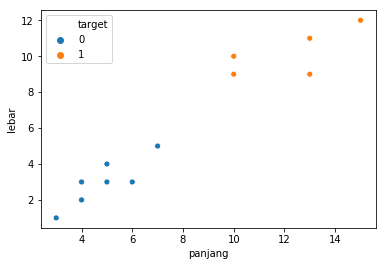

In [0]:
# PLOTTING DATA
ax = sns.scatterplot(x="panjang", y="lebar",hue="target",data=data)

In [0]:
# PENGUBAHAN FORMAT DATASET AGAR SESUAI DENGAN MODEL ANN KERAS
x = data.iloc[:,:2].values
y = data.iloc[:,2].values

In [0]:
# MELIHAT FORMAT INPUT YANG SESUAI DENGAN MODEL 
x

array([[ 4,  2],
       [ 5,  3],
       [ 6,  3],
       [13,  9],
       [ 5,  3],
       [10,  9],
       [10, 10],
       [ 3,  1],
       [ 5,  4],
       [ 7,  5],
       [15, 12],
       [13, 11],
       [ 4,  3],
       [ 4,  2],
       [ 4,  3]])

In [0]:
# MELIHAT FORMAT OUTPUT YANG SESUAI DENGAN MODEL 
y

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [2]:
# INISIASI ANN (Artificial Neural Network)
classifier = Sequential()

# INISIASI INPUT LAYER SEBANYAK 2 LAYER DAN HIDDEN LAYER SEBANYAK 15 NODE
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

# PENDAMBAHAN HIDDEN LAYER KEDUA 
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# PENDAMBAHAN HIDDEN LAYER KETIGA
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# PENDAMBAHAN HIDDEN LAYER KELIMA
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

# PENAMBAHAN OUTPUT LAYER
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# COMPILE ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# TRAINING
classifier.fit(x, y, batch_size = 10, epochs = 100)




Epoch 1/100





15/15 [==============================] - 1s 68ms/step - loss: 0.6931 - acc: 0.6667
Epoch 2/100
15/15 [==============================] - 0s 520us/step - loss: 0.6927 - acc: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 576us/step - loss: 0.6925 - acc: 0.6667
Epoch 4/100
15/15 [==============================] - 0s 689us/step - loss: 0.6923 - acc: 0.6667
Epoch 5/100
15/15 [==============================] - 0s 637us/step - loss: 0.6919 - acc: 0.6667
Epoch 6/100
15/15 [==============================] - 0s 752us/step - loss: 0.6916 - acc: 0.6667
Epoch 7/100
15/15 [==============================] - 0s 748us/step - loss: 0.6914 - acc: 0.6667
Epoch 8/100
15/15 [==============================] - 0s 502us/step - loss: 0.6909 - acc: 0.6667
Epoch 9/100
15/15 [==============================] - 0s 827us/step - loss: 0.6907 - acc: 0.6667
Epoch 10/100
15/15 [==============================] - 0s 770us/step - loss: 0.6903 - acc: 0.6667
Epoch 11/100
15/15 [============

In [0]:
# CARA SAVE MODEL
classifier.save("model.h5")

In [0]:
# CARA MENGAMBIL MODEL
from keras.models import load_model

model = load_model('model.h5')

In [0]:
# PREDIKSI/INFERENCE

# kita akan memprediksikan jika ada inputan panjang = 1 & lebar = 1 maka model akan memprediksikan spesies menjadi 1 atau 0
a = np.array([[1,1]])
y_pred = classifier.predict(a)

In [0]:
# HASIL PREDIKSI
y_pred

array([[0.01532563]], dtype=float32)

In [0]:
if(y_pred < 0.5):
  print("Spesies A")
else:
  print("Spesies B")

Spesies A
